# Household or Handheld: A statistical report on the mean sales of handheld vs home consoles.

# Introduction

While some individuals enjoy the convenience and lower price tag of handheld games such as the DS, others may prefer the traditional experience that home gaming consoles like Wii provide.  As the video game industry continues to grow, gaming companies can gain insight by looking at the popularity of these two platforms to decide which direction to launch their next project.

Due to the high popularity of console gaming in North America, with over half of American households owning a gaming console*(1)*, we expect there will be a significant difference in the mean game sales, with the mean sales of console video games being higher than that of handheld games. Therefore, in our project, we will be exploring the research question, "Is there a difference in the popularity of handheld devices and home consoles for gaming in North America?". To answer this inferential question, we will be gathering mean and standard deviation statistics from the "Video Game Sales" dataset found on Kaggle, by Gregory Smith. The dataset has 11 variables, but we are only interested in North American sales (in millions), the platform (Handheld or home system) of the video game, and cleaning the dataset by the year.


# Preliminary Results

In [1]:
# uncomment and run if tidymodels does not exist
#install.packages("tidymodels")


In [2]:
library(tidyverse)
library(tidymodels)
options(repr.plot.width = 10, repr.plot.height = 8)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

In [3]:
# Allowing the data to be reproducible
set.seed(100)

# Grabbing the data
url <- "https://raw.githubusercontent.com/xonew/Stat-201-21-Project/main/vgsales.csv"

#Reading data into R
gaming_dataset <- read_csv(url)

#Selecting columns we need for our analysis
gaming_data <- gaming_dataset %>%
filter(
Year > 2001,
NA_Sales > 0) %>%
select(Name, Year, Platform, NA_Sales) |>
  mutate(Platform = if_else(Platform %in% c("DS", "GBA", "GB", "PSV", "PSP"), "Handheld", "Home Console"))

gaming_data

Rows: 16598 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Platform, Year, Genre, Publisher
dbl (6): Rank, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Year,Platform,NA_Sales
<chr>,<chr>,<chr>,<dbl>
Wii Sports,2006,Home Console,41.49
Mario Kart Wii,2008,Home Console,15.85
Wii Sports Resort,2009,Home Console,15.75
⋮,⋮,⋮,⋮
Woody Woodpecker in Crazy Castle 5,2002,Handheld,0.01
Men in Black II: Alien Escape,2003,Home Console,0.01
Spirits & Spells,2003,Handheld,0.01


(Figure 1.1)

Our dataset consists of the sales data for 10129 games released in North America after the year 2001. We chose to use this year as a cutoff because it is the release year of modern milestones, the Xbox (home system), and the Game Boy Advance (handheld). *(2)*

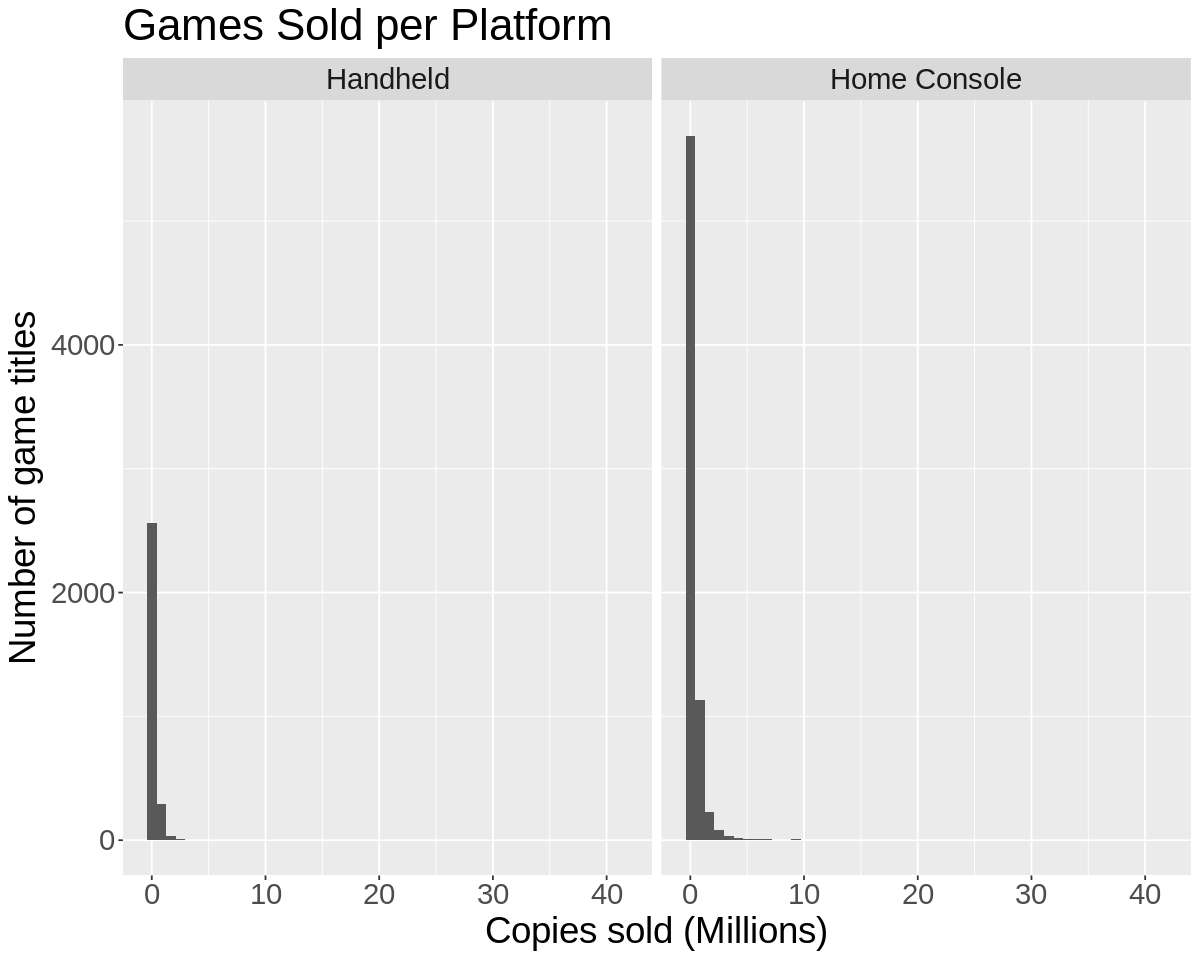

In [4]:
# Allowing the data to be reproducible
set.seed(100)

#Comparing the sampling distributions of handheld and home console systems in North America
gaming_data_dist_na <-
gaming_data %>%
  ggplot() +
  geom_histogram(aes(x = NA_Sales), bins = 50) +
  facet_wrap(~ Platform) +
  xlab("Copies sold (Millions)") +
  ylab("Number of game titles") +
  ggtitle("Games Sold per Platform")+
  theme(text = element_text(size = 22))
gaming_data_dist_na

(Figure 1.2)

This is a plot of the global sales figures of our sample. It features a heavily right-skewed unimodal distribution. The number of total sales for home console systems eclipses that of the sales for handheld console systems, but the centers of the distributions appear to be fairly close to one another. Note that there are values on the right of the graph, but they are not visible due to being too small.

In [5]:
# Allowing the data to be reproducible
set.seed(100)


# Grabbing total sales and titles
total_sales <- sum(gaming_data$NA_Sales)
total_titles <- NROW(gaming_data)

# Computing summary statistics
sum_stats <-
  gaming_data |>
  group_by(Platform) |>
  summarise(Num_Titles = n(),
            Sales_Total = sum(NA_Sales),
            Titles_Proportion = Num_Titles/total_titles,
            Sales_Proportion = Sales_Total/total_sales,
            Sales_Mean = mean(NA_Sales),
            Sales_SD = sd(NA_Sales))
Means_Diff  <- c(sum_stats$Sales_Mean[2]-sum_stats$Sales_Mean[1], "x")

# Degrees of freedom for our two sample t-test
Deg_Freedom <- c((sum_stats$Sales_SD[1]/sum_stats$Num_Titles[1] + sum_stats$Sales_SD[2]/sum_stats$Num_Titles[2])^2/(
                            sum_stats$Sales_SD[1]^4/(sum_stats$Num_Titles[1]^2*(sum_stats$Num_Titles[1])) +
                              sum_stats$Sales_SD[2]^4/(sum_stats$Num_Titles[2]^2*(sum_stats$Num_Titles[2]))), "x")

# Displaying the text
cbind(sum_stats, Means_Diff, Deg_Freedom)

Platform,Num_Titles,Sales_Total,Titles_Proportion,Sales_Proportion,Sales_Mean,Sales_SD,Means_Diff,Deg_Freedom
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Handheld,2912,667.83,0.2874914,0.2015963,0.2293372,0.5101972,0.137141921185023,19848.0371669035
Home Console,7217,2644.88,0.7125086,0.7984037,0.3664791,0.9114268,x,x


(Figure 1.3)

This table displays the total numbers for our dataset. The total number of titles and sales for each type of console are shown, as well as their proportion of titles and sales. We can see that the number of titles for handheld systems is under-represented by their sales, which points to a difference in means.

Sample estimates for our center and scale variables: mean and standard deviation, respectively, are also shown. We chose to use these types of parameters because they are sensitive to outliers, which corresponds well to our heavily skewed dataset.

Finally, we have an estimate of our parameter of interest: the difference in means. It is not zero, but whether it is "significantly not zero" remains to be seen. We also have the degrees of freedom we will need to use for the upcoming t-test.

In [6]:
gaming_data

Name,Year,Platform,NA_Sales
<chr>,<chr>,<chr>,<dbl>
Wii Sports,2006,Home Console,41.49
Mario Kart Wii,2008,Home Console,15.85
Wii Sports Resort,2009,Home Console,15.75
⋮,⋮,⋮,⋮
Woody Woodpecker in Crazy Castle 5,2002,Handheld,0.01
Men in Black II: Alien Escape,2003,Home Console,0.01
Spirits & Spells,2003,Handheld,0.01


***Hypothesis Test using Bootstrapping***

In [7]:
# Allowing the data to be reproducible
set.seed(100)

#calculating the observed mean difference between Console game sales and handheld game sales
obs_mean_sales_diff <- gaming_data |>
specify(formula = NA_Sales ~ Platform) |>
calculate(stat="diff in means", order=c("Home Console", "Handheld"))

obs_mean_sales_diff

#Simulating the null distribution
null_diff_in_means <- gaming_data |>
specify(formula = NA_Sales ~ Platform) |>
hypothesize(null="independence") |>
generate(reps=1000, type = "permute") |>
calculate(stat="diff in means", order=c("Home Console", "Handheld"))

head(null_diff_in_means)

stat
<dbl>
0.1371419


replicate,stat
<int>,<dbl>
1,1.065897e-02
2,-5.858080e-03
3,1.782584e-02
4,8.711822e-03
5,-2.165027e-06
6,-1.830250e-02


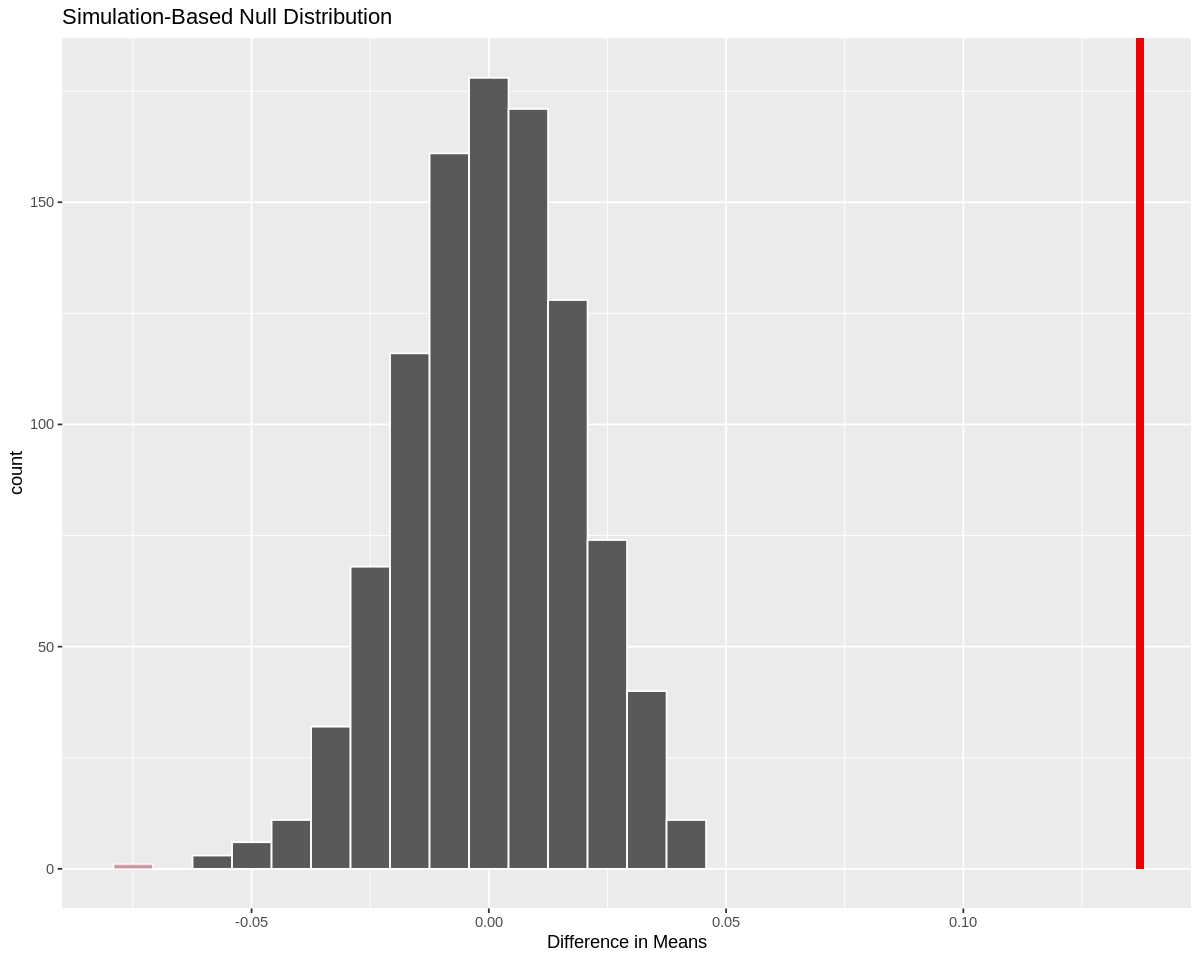

In [19]:
#Visualising the null distribution and where our obersved test statistic lies
diff_in_means_plot <- null_diff_in_means |>
visualize() +
shade_p_value(obs_stat= obs_mean_sales_diff, direction= "both") +
xlab("Difference in Means")  

diff_in_means_plot

In [16]:
#obtaining p-value
p_value <- null_diff_in_means %>%
  get_p_value(obs_stat = obs_mean_sales_diff, direction = "both")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


***Hypothesis Testing using 2 Sample T-Test***

# Methods: Plan

This report is trustworthy because it includes a large dataset, uses current data (2001-2015), and the data points are distinct. The plots and statistics we have provided thus far provide an estimate of our relevant parameters but they are not enough by itself to prove a significant difference in means.  In order to determine this, we will complete a two-sided two-sample t-test using bootstrapping with 19848 degrees of freedom. The CLT will apply due to our large sample size; we need this due to our highly skewed sample.

Null hypothesis (H0): there is no significant difference in means between handheld and home console sales in North America. $H_0: \mu_1 - \mu_2 = d_0$

Alternative hypothesis (H1): there is a significant difference in means between handheld and home console sales in North America. $H_1: \mu_1 - \mu_2 \neq d_0$

Afterwards, we will obtain a 95% confidence interval using bootstrapping to confirm our hypothesis test results. Future questions this could lead to are: Is the meaningful difference in mean video games sales due to specific consoles or handheld gaming devices?  Is this difference due to specific brands?  Is there a meaningful difference in the enjoyment level of console users versus handheld device users?


# References

0. GregorySmith. (2016, October 26). Video game sales. Kaggle. https://www.kaggle.com/datasets/gregorut/videogamesales

1. Owens, T. (2022, August 11). Gaming console ownership and purchase intentions among households in the United States as of May 2021. Statista. https://www.statista.com/statistics/1277164/purchase-video-game-consoles/

2. Encyclopædia Britannica, inc. (2023, July 19). Xbox. Encyclopædia Britannica. https://www.britannica.com/technology/Xbox
